In [28]:
import spacy
from spacy.lang.es import Spanish
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
def getSentences(text):
    nlp = Spanish()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

In [30]:
def printToken(token):
    print(token.text, "->", token.dep_)

In [32]:
def appendChunk(original, chunk):
    return original + ' ' + chunk

In [33]:
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

In [13]:
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

In [34]:
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())


In [15]:
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

In [67]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    #plt.figure()
    plt.figure(3,figsize=(20,20))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='cyan', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

 conj
autorizadas -> amod
con -> case
facultad -> obl
expresa -> amod
para -> mark
acceder -> acl
a -> case
esa -> det
información -> obj
. -> punct
 , reservar enunciar numeral solicitar autorizar expreso , solo titular información
Nota -> ROOT
: -> punct
 , Nota , 
Declarado -> ROOT
EXEQUIBLE -> obj
mediante -> case
sentencia -> obl
C-951 -> appos
de -> case
2014 -> nmod
, -> punct
con -> case
excepción -> obl
del -> case
parágrafo -> nmod
, -> punct
el -> det
cual -> nsubj
se -> obj
declara -> ccomp
EXEQUIBLE -> nsubj
, -> punct
bajo -> case
el -> det
entendido -> obl
que -> obj
los -> det
eventos -> nsubj
allí -> advmod
previstos -> amod
, -> punct
también -> advmod
son -> cop
aplicables -> acl
para -> case
el -> det
numeral -> obl
8 -> appos
referente -> amod
a -> case
los -> det
datos -> obj
genéticos -> amod
humanos -> amod
. -> punct
cual EXEQUIBLE eventos , Declarado prever referente genético humano , EXEQUIBLE se que datos
Artículo -> ROOT
25 -> nummod
. -> punct
 , Artículo 

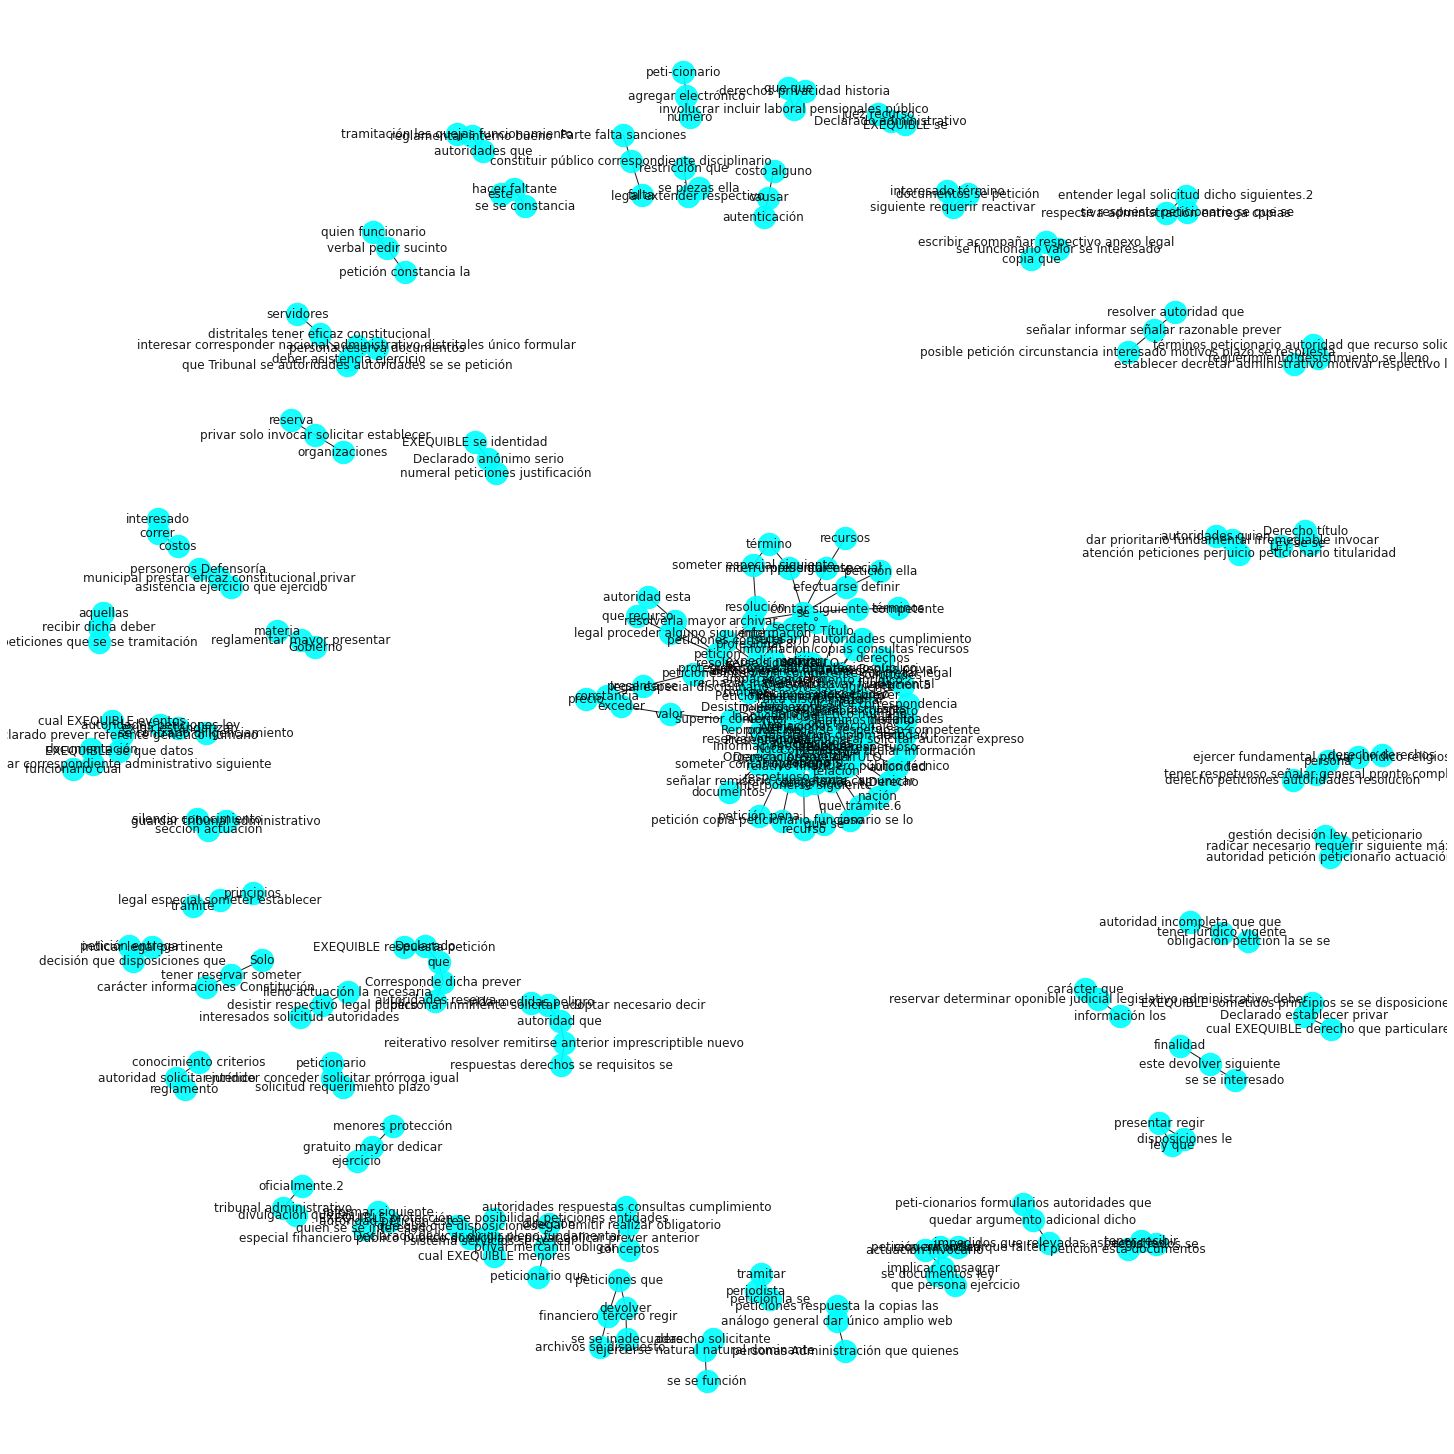

In [68]:
if __name__ == "__main__":

    text = "LEY 1755 DE 2015 " \
            "Por medio de la cual se regula el Derecho Fundamental de Petición y se sustituye " \
            "un título del Código de Procedimiento Administrativo y de lo Contencioso Administrativo " \
            "EL CONGRESO DE COLOMBIA" \
            "Ver Sentencia C-951 de 2014. Corte Constitucional." \
            "DECRETA:" \
            "ARTÍCULO 1°. Sustitúyase el Título II, Derecho de Petición, Capítulo I, Derecho de "\
            "Petición ante las autoridades-Reglas Generales, Capítulo II Derecho de petición "\
            "ante autoridades-Reglas Especiales y Capítulo III Derecho de Petición ante "\
            " organizaciones e instituciones privadas, artículos 13 a 33, de la Parte Primera "\
            "de la Ley 1437 de  2011, por el siguiente:"\
            "TÍTULO II"\
            "DERECHO PETICIÓN"\
            "CAPÍTULO I"\
            "Derecho de petición ante autoridades reglas generales"\
            "Artículo 13. Objeto y modalidades del derecho de petición ante autoridades."\
            "Toda persona tiene derecho a presentar peticiones respetuosas a las autoridades, "\
            "en los términos señalados en este código, por motivos de interés general o "\
            "particular, y a obtener pronta resolución completa y de fondo sobre la misma."\
            "Toda actuación que inicie cualquier persona ante las autoridades implica el "\
            "ejercicio del derecho de petición consagrado en el artículo 23 de la Constitución "\
            "Política, sin que sea necesario invocarlo. Mediante él, entre otras actuaciones, "\
            "se podrá solicitar: el reconocimiento de un derecho, la intervención de una entidad "\
            "o funcionario, la resolución de una situación jurídica, la prestación de un servicio,"\
            " requerir información, consultar, examinar y requerir copias de documentos, formular "\
            "consultas, quejas, denuncias y reclamos e interponer recursos."\
            "El ejercicio del derecho de petición es gratuito y puede realizarse sin necesidad de "\
            "representación a través de abogado, o de persona mayor cuando se trate de menores en "\
            "relación a las entidades dedicadas a su protección o formación."\
            "Nota: Declarado EXEQUIBLE mediante sentencia C-951 de 2014 con excepción de la "\
            "expresión 'en relación a las entidades dedicadas a su protección o formación', "\
            "la cual se declara EXEQUIBLE, siempre y cuando no excluya la posibilidad de que los "\
            "menores de edad presenten directamente peticiones dirigidas a otras entidades para "\
            "el pleno ejercicio de sus derechos fundamentales."\
            "Artículo 14. Términos para resolver las distintas modalidades de peticiones. Salvo "\
            "norma legal especial y so pena de sanción disciplinaria, toda petición deberá "\
            "resolverse dentro de los quince (15) días siguientes a su recepción. "\
            "Estará sometida a término especial la resolución de las siguientes peticiones:"\
            "1. Las peticiones de documentos y de información deberán resolverse dentro de los "\
            "diez (10) días siguientes a su recepción. Si en ese lapso no se ha dado respuesta "\
            "al peticionario, se entenderá, para todos los efectos legales, que la respectiva "\
            "solicitud ha sido aceptada y, por consiguiente, la administración ya no podrá negar "\
            "la entrega de dichos documentos al peticionario, y como consecuencia las copias se "\
            "entregarán dentro de los tres (3) días siguientes."\
            "2. Las peticiones mediante las cuales se eleva una consulta a las autoridades en "\
            "relación con las materias a su cargo deberán resolverse dentro de los treinta (30) "\
            "días siguientes a su recepción."\
            "Parágrafo. Cuando excepcionalmente no fuere posible resolver la petición en los "\
            "plazos aquí señalados, la autoridad debe informar esta circunstancia al interesado, "\
            "antes del vencimiento del término señalado en la ley expresando los motivos de la "\
            "demora y señalando a la vez el plazo razonable en que se resolverá o dará respuesta, "\
            "que no podrá exceder del doble del inicialmente previsto."\
            "Ver Art. 5 del Decreto Legislativo 491 de 2020."\
            "Artículo 15. Presentación y radicación de peticiones. Las peticiones podrán "\
            "presentarse verbalmente y deberá quedar constancia de la misma, o por escrito, y a "\
            "través de cualquier medio idóneo para la comunicación o transferencia de datos. Los "\
            "recursos se presentarán conforme a las normas especiales de este código."\
            "Cuando una petición no se acompañe de los documentos e informaciones requeridos por "\
            "la ley, en el acto de recibo la autoridad deberá indicar al peticionario los que "\
            "falten."\
            "Si este insiste en que se radique, así se hará dejando constancia de los requisitos "\
            "o documentos faltantes. Si quien presenta una petición verbal pide constancia de "\
            "haberla presentado, el funcionario la expedirá en forma sucinta."\
            "Las autoridades podrán exigir que ciertas peticiones se presenten por escrito, y "\
            "pondrán a disposición de los interesados, sin costo, a menos que una ley expresamente "\
            "señale lo contrario, formularios y otros instrumentos estandarizados para facilitar "\
            "su diligenciamiento. En todo caso, los peti­cionarios no quedarán impedidos para "\
            "aportar o formular con su petición argumentos, pruebas o documentos adicionales que"\
            " los formularios no contemplen, sin que por su utilización las autoridades queden "\
            "relevadas del deber de resolver sobre todos los aspectos y pruebas que les sean "\
            "planteados o presentados más allá del contenido de dichos formularios."\
            "A la petición escrita se podrá acompañar una copia que, recibida por el funcionario "\
            "respectivo con anotación de la fecha y hora de su presentación, y del número y clase "\
            "de los documentos anexos, tendrá el mismo valor legal del original y se devolverá al "\
            "interesado a través de cualquier medio idóneo para la comunicación o transferencia de "\
            "datos. Esta autenticación no causará costo alguno al peticionario."\
            "Parágrafo 1°. En caso de que la petición sea enviada a través de cualquier medio "\
            "idóneo para la comunicación o transferencia de datos, esta tendrá como datos de "\
            "fecha y hora de radicación, así como el número y clase de documentos recibidos, "\
            "los registrados en el medio por el cual se han recibido los documentos."\
            "Parágrafo 2°. Ninguna autoridad podrá negarse a la recepción y radicación de "\
            "solicitudes y peticiones respetuosas."\
            "Parágrafo 3°. Cuando la petición se presente verbalmente ella deberá efectuarse en "\
            "la oficina o dependencia que cada entidad defina para ese efecto. El Gobierno "\
            "Nacional reglamentará la materia en un plazo no mayor a noventa (90) días, a partir "\
            "de la promulgación de la presente ley."\
            "Artículo 16. Contenido de las peticiones. Toda petición deberá contener, por lo "\
            "menos:"\
            "1. La designación de la autoridad a la que se dirige."\
            "2. Los nombres y apellidos completos del solicitante y de su repre­sentante y o "\
            "apoderado, si es el caso, con indicación de su documento de identidad y de la "\
            "dirección donde recibirá correspondencia. El peti­cionario podrá agregar el número "\
            "de fax o la dirección electrónica. Si el peticionario es una persona privada que "\
            "deba estar inscrita en el registro mercantil, estará obligada a indicar su "\
            "dirección electrónica."\
            "3. El objeto de la petición."\
            "4. Las razones en las que fundamenta su petición."\
            "5. La relación de los documentos que desee presentar para iniciar el trámite."\
            "6. La firma del peticionario cuando fuere el caso."\
            "Parágrafo 1°. La autoridad tiene la obligación de examinar integralmente la petición, "\
            "y en ningún caso la estimará incompleta por falta de requisitos o documentos que no "\
            "se encuentren dentro del marco jurídico vigente, que no sean necesarios para "\
            "resolverla o que se encuentren dentro de sus archivos."\
            "Parágrafo 2°. En ningún caso podrá ser rechazada la petición por motivos de "\
            "fundamentación inadecuada o incompleta."\
            "Nota: Declarado EXEQUIBLE mediante sentencia C-951 de 2014, siempre y cuando el "\
            "numeral 2° se entienda sin perjuicio de que las peticiones de carácter anónimo deban "\
            "ser admitidas para trámite y resolución de fondo, cuando exista una justificación "\
            "seria y creíble del peticionario para mantener en reserva su identidad."\
            "Artículo 17. Peticiones incompletas y desistimiento tácito. En virtud del principio "\
            "de eficacia, cuando la autoridad constate que una petición ya radicada está "\
            "incompleta o que el peticionario deba realizar una gestión de trámite a su cargo, "\
            "necesaria para adoptar una decisión de fondo, y que la actuación pueda continuar sin "\
            "oponerse a la ley, requerirá al peticionario dentro de los diez (10) días siguientes "\
            "a la fecha de radicación para que la complete en el término máximo de un (1) mes."\
            "A partir del día siguiente en que el interesado aporte los documentos o informes "\
            "requeridos, se reactivará el término para resolver la petición."\
            "Se entenderá que el peticionario ha desistido de su solicitud o de la actuación "\
            "cuando no satisfaga el requerimiento, salvo que antes de vencer el plazo concedido "\
            "solicite prórroga hasta por un término igual."\
            "Vencidos los términos establecidos en este artículo, sin que el peticionario haya "\
            "cumplido el requerimiento, la autoridad decretará el desistimiento y el archivo del "\
            "expediente, mediante acto administrativo motivado, que se notificará personalmente, "\
            "contra el cual únicamente procede recurso de reposición, sin perjuicio de que la "\
            "respectiva solicitud pueda ser nuevamente presentada con el lleno de los requisitos "\
            "legales."\
            "Artículo 18. Desistimiento expreso de la petición. Los interesados podrán desistir "\
            "en cualquier tiempo de sus peticiones, sin perjuicio de que la respectiva solicitud "\
            "pueda ser nuevamente presentada con el lleno de los requisitos legales, pero las "\
            "autoridades podrán continuar de oficio la actuación si la consideran necesaria por "\
            "razones de interés público; en tal caso expedirán resolución motivada."\
            "Artículo 19. Peticiones irrespetuosas, oscuras o reiterativas. Toda petición debe "\
            "ser respetuosa so pena de rechazo. Solo cuando no se comprenda la finalidad u "\
            "objeto de la petición esta se devolverá al interesado para que la corrija o aclare "\
            "dentro de los diez (10) días siguientes. En caso de no corregirse o aclararse, se "\
            "archivará la petición. En ningún caso se devolverán peticiones que se consideren "\
            "inadecuadas o incompletas."\
            "Respecto de peticiones reiterativas ya resueltas, la autoridad podrá remitirse a "\
            "las respuestas anteriores, salvo que se trate de derechos imprescriptibles, o de "\
            "peticiones que se hubieren negado por no acreditar requisitos, siempre que en la "\
            "nueva petición se subsane."\
            "Artículo 20. Atención prioritaria de peticiones. Las autoridades darán atención "\
            "prioritaria a las peticiones de reconocimiento de un derecho fundamental cuando "\
            "deban ser resueltas para evitar un perjuicio irremediable al peticionario, quien "\
            "deberá probar sumariamente la titularidad del derecho y el riesgo del perjuicio "\
            "invocado."\
            "Cuando por razones de salud o de seguridad personal esté en peligro inminente la "\
            "vida o la integridad del destinatario de la medida solicitada, la autoridad "\
            "adoptará de inmediato las medidas de urgencia necesarias para conjurar dicho "\
            "peligro, sin perjuicio del trámite que deba darse a la petición. Si la petición "\
            "la realiza un periodista, para el ejercicio de su actividad, se tramitará "\
            "preferencialmente."\
            "Artículo 21. Funcionario sin competencia. Si la autoridad a quien se dirige la "\
            "petición no es la competente, se informará de inmediato al interesado si este "\
            "actúa verbalmente, o dentro de los cinco (5) días siguientes al de la recepción, "\
            "si obró por escrito. Dentro del término señalado remitirá la petición al competente "\
            "y enviará copia del oficio remisorio al peticionario o en caso de no existir "\
            "funcionario competente así se lo comunicará. Los términos para decidir o responder "\
            "se contarán a partir del día siguiente a la recepción de la Petición por la "\
            "autoridad competente."\
            "Artículo 22. Organización para el trámite interno y decisión de las peticiones. "\
            "Las autoridades reglamentarán la tramitación interna de las peticiones que les "\
            "corresponda resolver, y la manera de atender las quejas para garantizar el buen "\
            "funcionamiento de los servicios a su cargo."\
            "Cuando más de diez (10) personas formulen peticiones análogas, de información, de "\
            "interés general o de consulta, la Administración podrá dar una única respuesta que "\
            "publicará en un diario de amplia circulación, la pondrá en su página web y entregará "\
            "copias de la misma a quienes las soliciten."\
            "Nota: Declarado EXEQUIBLE mediante sentencia C-951 de 2014, sin perjuicio de que deba "\
            "enviarse respuesta a todos los que hayan formulado la petición."\
            "Artículo 23. Deberes especiales de los personeros distritales y municipales y de los "\
            "servidores de la Procuraduría y la Defensoría del Pueblo. Los servidores de la "\
            "Procuraduría General de la Nación, de la Defensoría del Pueblo, así como los "\
            "personeros distritales y municipales, según la órbita de competencia, tienen el deber "\
            "de prestar asistencia eficaz e inmediata a toda persona que la solicite, para "\
            "garantizarle el ejercicio del derecho constitucional de petición. Si fuere necesario, "\
            "deberán intervenir ante las autoridades competentes con el objeto de exigirles, en "\
            "cada caso concreto, el cumplimiento de sus deberes legales. Así mismo recibirán, en "\
            "sustitución de dichas autoridades, las peticiones, quejas, reclamos o recursos que "\
            "aquellas se hubieren abstenido de recibir, y se cerciorarán de su debida tramitación."\
            "CAPÍTULO II"\
            "Derecho de petición ante autoridades"\
            "Reglas especiales"\
            "Artículo 24. Informaciones y documentos reservados. Solo tendrán carácter reservado "\
            "las informaciones y documentos expresamente sometidos a reserva por la Constitución "\
            "Política o la ley, y en especial:"\
            "1. Los relacionados con la defensa o seguridad nacionales."\
            "2. Las instrucciones en materia diplomática o sobre negociaciones reservadas."\
            "3. Los que involucren derechos a la privacidad e intimidad de las personas, incluidas "\
            "en las hojas de vida, la historia laboral y los expedientes pensionales y demás "\
            "registros de personal que obren en los archivos de las instituciones públicas o "\
            "privadas, así como la historia clínica."\
            "4. Los relativos a las condiciones financieras de las operaciones de crédito público "\
            "y tesorería que realice la nación, así como a los estudios técnicos de valoración de "\
            "los activos de la nación. Estos documentos e informaciones estarán sometidos a "\
            "reserva por un término de seis (6) meses contados a partir de la realización de la "\
            "respectiva operación."\
            "5. Los datos referentes a la información financiera y comercial, en los términos de "\
            "la Ley Estatutaria 1266 de 2008."\
            "6. Los protegidos por el secreto comercial o industrial, así como los planes "\
            "estratégicos de las empresas públicas de servicios públicos."\
            "7. Los amparados por el secreto profesional."\
            "8. Los datos genéticos humanos."\
            "Parágrafo. Para efecto de la solicitud de información de carácter reservado, "\
            "enunciada en los numerales 3, 5, 6 y 7 solo podrá ser solicitada por el titular "\
            "de la información, por sus apoderados o por personas autorizadas con facultad "\
            "expresa para acceder a esa información."\
            "Nota: Declarado EXEQUIBLE mediante sentencia C-951 de 2014, con excepción del "\
            "parágrafo, el cual se declara EXEQUIBLE, bajo el entendido que los eventos allí "\
            "previstos, también son aplicables para el numeral 8 referente a los datos "\
            "genéticos humanos."\
            "Artículo 25. Rechazo de las peticiones de información por motivo de reserva. "\
            "Toda decisión que rechace la petición de informaciones o documentos será "\
            "motivada, indicará en forma precisa las disposiciones legales que impiden la "\
            "entrega de información o documentos pertinentes y deberá notificarse al "\
            "peticionario. Contra la decisión que rechace la petición de informaciones o "\
            "documentos por motivos de reserva legal, no procede recurso alguno, salvo "\
            "lo previsto en el artículo siguiente."\
            "La restricción por reserva legal no se extenderá a otras piezas del respectivo "\
            "expediente o actuación que no estén cubiertas por ella."\
            "Artículo 26. Insistencia del solicitante en caso de reserva. Si la persona "\
            "interesada insistiere en su petición de información o de documentos ante la "\
            "autoridad que invoca la reserva, corresponderá al Tribunal Administrativo con "\
            "jurisdicción en el lugar donde se encuentren los documentos, si se trata de "\
            "autoridades nacionales, departamentales o del Distrito Capital de Bogotá, o "\
            "al juez administrativo si se trata de autoridades distritales y municipales "\
            "decidir en única instancia si se niega o se acepta, total o parcialmente la "\
            "petición formulada."\
            "Para ello, el funcionario respectivo enviará la documentación correspondiente "\
            "al tribunal o al juez administrativo, el cual decidirá dentro de los diez (10) "\
            "días siguientes. Este término se interrumpirá en los siguientes casos:"\
            "1. Cuando el tribunal o el juez administrativo solicite copia o fotocopia de "\
            "los documentos sobre cuya divulgación deba decidir, o cualquier otra "\
            "información que requieran, y hasta la fecha en la cual las reciba oficialmente."\
            "2. Cuando la autoridad solicite, a la sección del Consejo de Estado que el "\
            "reglamento disponga, asumir conocimiento del asunto en atención a su "\
            "importancia jurídica o con el objeto de unificar criterios sobre el tema. Si "\
            "al cabo de cinco (5) días la sección guarda silencio, o decide no avocar "\
            "conocimiento, la actuación continuará ante el respectivo tribunal o juzgado "\
            "administrativo."\
            "Parágrafo. El recurso de insistencia deberá interponerse por escrito y "\
            "sustentado en la diligencia de notificación, o dentro de los diez (10) "\
            "días siguientes a ella."\
            "Nota: Declarado EXEQUIBLE mediante sentencia C-951 de 2014 en el entendido de "\
            "que en los municipios en los que no exista juez administrativo, se podrá "\
            "instaurar este recurso ante cualquier juez del lugar."\
            "Artículo 27. Inaplicabilidad de las excepciones. El carácter reservado de una "\
            "información o de determinados documentos, no será oponible a las autoridades "\
            "judiciales, legislativas, ni a las autoridades administrativas que siendo "\
            "constitucional o legalmente competentes para ello, los soliciten para el debido "\
            "ejercicio de sus funciones. Corresponde a dichas autoridades asegurar la reserva "\
            "de las informaciones y documentos que lleguen a conocer en desarrollo de lo previsto "\
            "en este artículo."\
            "Artículo 28. Alcance de los conceptos. Salvo disposición legal en contrario, los "\
            "conceptos emitidos por las autoridades como respuestas a peticiones realizadas en "\
            "ejercicio del derecho a formular consultas no serán de obligatorio cumplimiento o "\
            "ejecución."\
            "Artículo 29. Reproducción de documentos. En ningún caso el precio de las copias "\
            "podrá exceder el valor de la reproducción. Los costos de la expedición de las copias "\
            "correrán por cuenta del interesado en obtenerlas."\
            "El valor de la reproducción no podrá ser superior al valor comercial de referencia "\
            "en el mercado."\
            "Artículo 30. Peticiones entre autoridades. Cuando una autoridad formule una petición "\
            "de información o de documentos a otra, esta deberá resolverla en un término no mayor "\
            "de diez (10) días. En los demás casos, resolverá las solicitudes dentro de los plazos "\
            "previstos en el artículo 14."\
            "Artículo 31. Falta disciplinaria. La falta de atención a las peticiones y a los "\
            "términos para resolver, la contravención a las prohibiciones y el desconocimiento de "\
            "los derechos de las personas de que trata esta Parte Primera del Código, constituirán "\
            "falta para el servidor público y darán lugar a las sanciones correspondientes de "\
            "acuerdo con el régimen disciplinario."\
            "CAPÍTULO III"\
            "Derecho de petición ante organizaciones e instituciones priva­das"\
            "Artículo 32. Derecho de petición ante organizaciones privadas para garantizar los "\
            "derechos fundamentales. Toda persona podrá ejercer el derecho de petición para "\
            "garantizar sus derechos fundamentales ante organizaciones privadas con o sin "\
            "personería jurídica, tales como sociedades, corporaciones, fundaciones, asociaciones, "\
            "organizaciones religiosas, cooperativas, instituciones financieras o clubes."\
            "Salvo norma legal especial, el trámite y resolución de estas peticiones estarán "\
            "sometidos a los principios y reglas establecidos en el Capítulo I de este título."\
            "Las organizaciones privadas solo podrán invocar la reserva de la información "\
            "solicitada en los casos expresamente establecidos en la Constitución Política "\
            "y la ley."\
            "Las peticiones ante las empresas o personas que administran archivos y bases de "\
            "datos de carácter financiero, crediticio, comercial, de servicios y las "\
            "provenientes de terceros países se regirán por lo dispuesto en la Ley "\
            "Estatutaria del Hábeas Data."\
            "Parágrafo 1°. Este derecho también podrá ejercerse ante personas naturales cuando "\
            "frente a ellas el solicitante se encuentre en situaciones de indefensión, "\
            "subordinación o la persona natural se encuentre ejerciendo una función o posición "\
            "dominante frente al peticionario."\
            "Parágrafo 2°. Los personeros municipales y distritales y la Defensoría del Pueblo "\
            "prestarán asistencia eficaz e inmediata a toda persona que la solicite, para "\
            "garantizarle el ejercicio del derecho constitucional de petición que hubiere "\
            "ejercido o desee ejercer ante organizaciones o instituciones privadas."\
            "Parágrafo 3°. Ninguna entidad privada podrá negarse a la recepción y radicación de "\
            "solicitudes y peticiones respetuosas, so pena de incurrir en sanciones y/o multas "\
            "por parte de las autoridades competentes."\
            "Nota: Declarado EXEQUIBLE mediante sentencia C-951 de 2014, salvo la expresión ¨"\
            "estarán sometidos a los principios y reglas establecidos en el capítulo I de este "\
            "título¨, la cual se declara EXEQUIBLE, bajo el entendido de que el derecho de "\
            "petición ante organizaciones privadas se aplicarán, en lo pertinente, aquellas "\
            "disposiciones del Capitulo I que sean compatibles con la naturaleza de las funciones "\
            "que ejercen los particulares."\
            "Artículo 33. Derecho de petición de los usuarios ante instituciones privadas. Sin "\
            "perjuicio de lo dispuesto en leyes especiales, a las Cajas de Compensación Familiar, "\
            "a las Instituciones del Sistema de Seguridad Social Integral, a las entidades que "\
            "conforman el sistema financiero y bursátil y a aquellas empresas que prestan "\
            "servicios públicos y servicios públicos domiciliarios, que se rijan por el derecho "\
            "privado, se les aplicarán en sus relaciones con los usuarios, en lo pertinente, las "\
            "disposiciones sobre derecho de petición previstas en los dos capítulos anteriores."\
            "ARTÍCULO 2°. Vigencia. La presente ley rige a partir de la fecha de su promulgación y "\
            "deroga las disposiciones que le sean contrarias."
 
    sentences = getSentences(text)
    nlp_model = spacy.load('es_core_news_sm')

    triples = []
    print (text)
    for sentence in sentences:
        triples.append(processSentence(sentence))
    printGraph(triples)